In [58]:
library(pacman)
p_load(tidyverse, data.table, ggpubr, rstatix)
setwd("/mnt/projects/users/sgok603/pd_mr/git_deposits/scripts/")

## Figure1

In [2]:
wald_ivw_Hrisk <- read_tsv("../data/adult_tissues_wald_ivw_strong_results.txt",
                          show_col_types = FALSE)

wald_Hrisk <- read_tsv("../data/adult_tissues_wald_strong_results.txt",
                       show_col_types = FALSE)

merged_mr_and_afc <- read_tsv("../data/adult_tissues_merged_mr_strong_afc_res.txt",
                       show_col_types = FALSE)

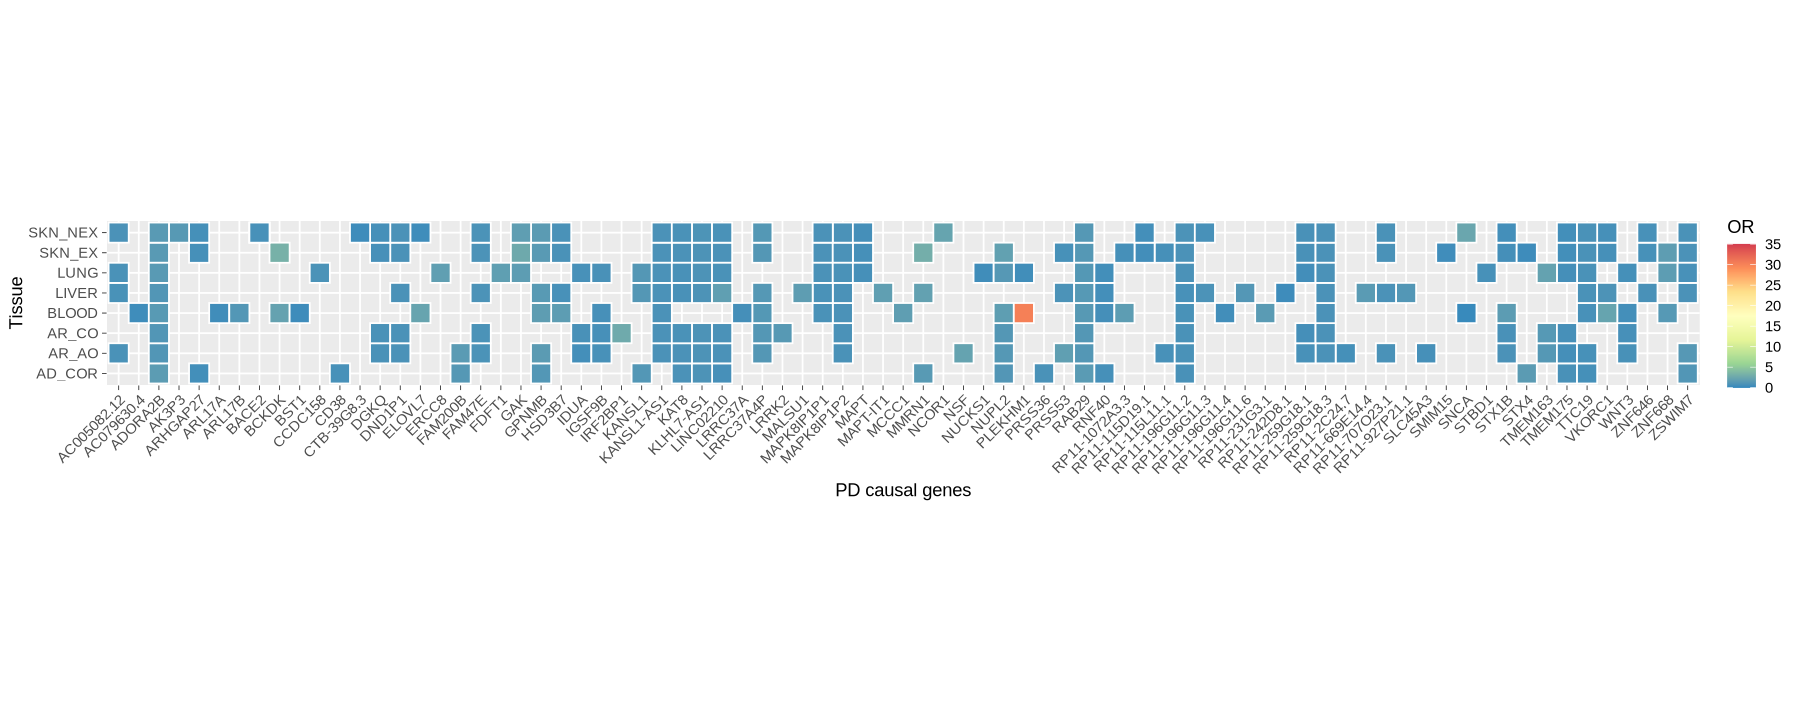

In [10]:
wald_ivw_Hrisk_short <- wald_ivw_Hrisk %>% 
dplyr::select(exposure, tissue, SNP, or) %>% 
# mutate(tissue_snp = paste0(tissue,"-",SNP)) %>% 
distinct()

options(repr.plot.width = 15, repr.plot.height = 6)
wald_ivw_Hrisk_short %>% 
ggplot(aes(exposure, tissue, fill = or)) +
geom_tile(color = "white", linewidth = 0.5) +
scale_fill_distiller(palette = "Spectral", limits = c(0, 35), breaks = seq(0, 35, 5)) +
coord_equal() +
labs(x = "PD causal genes", y = "Tissue", fill = "OR") +
theme(axis.text.x = element_text(angle = 45, hjust = 1),
     axis.ticks = element_line(linewidth = 0.25))
# ggsave("../../plots/manuscript/figure1b.pdf", width = 15, height = 6)

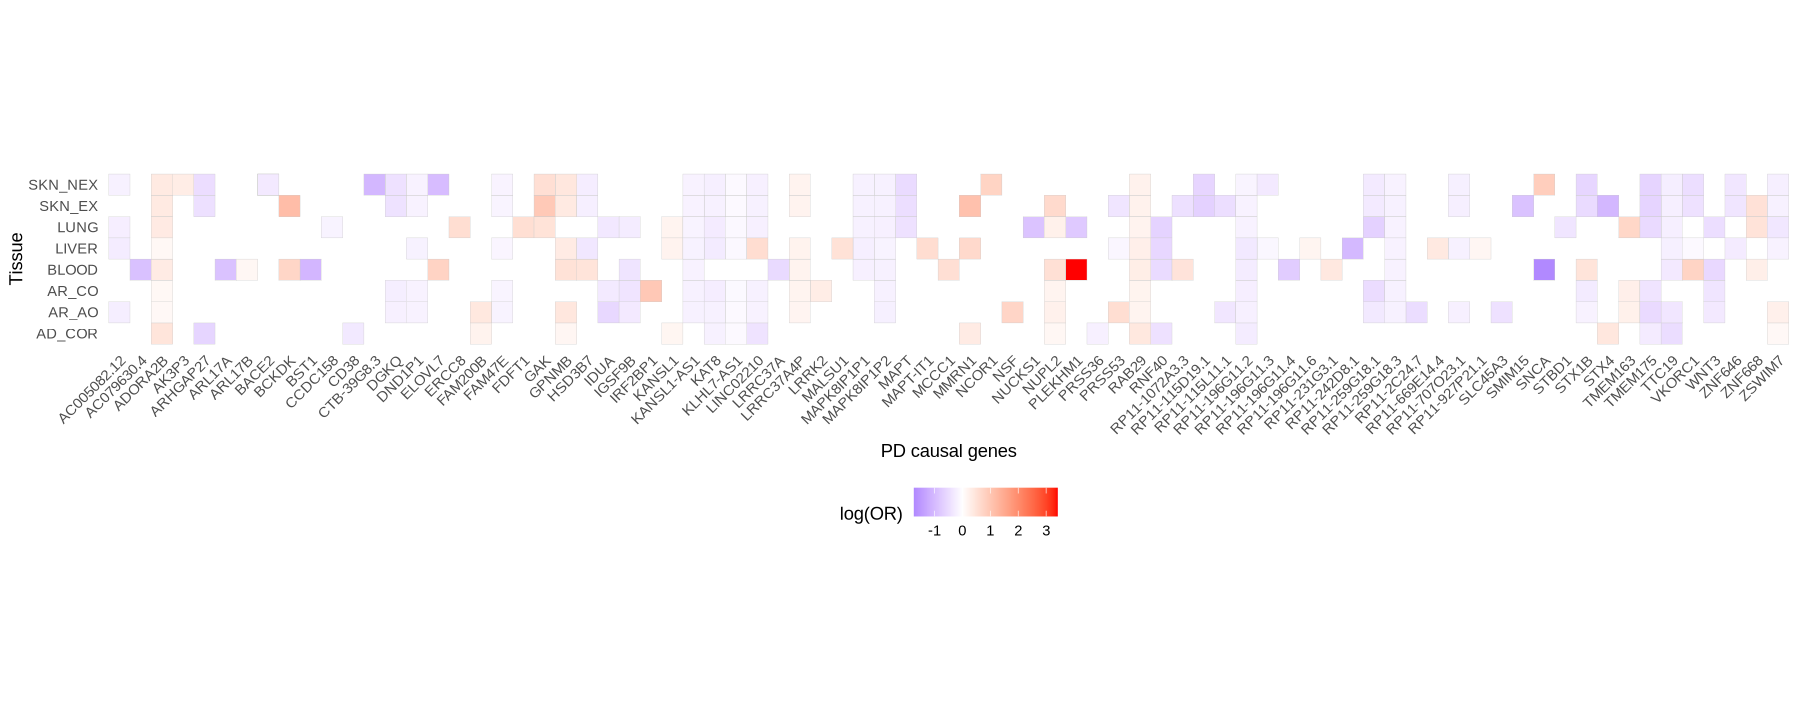

In [53]:
wald_ivw_Hrisk_short <- wald_ivw_Hrisk %>% 
dplyr::select(exposure, tissue, SNP, or) %>% 
mutate(log_OR = log(or)) %>% 
# mutate(tissue_snp = paste0(tissue,"-",SNP)) %>% 
distinct()
# wald_ivw_Hrisk_short
options(repr.plot.width = 15, repr.plot.height = 6)
wald_ivw_Hrisk_short %>% 
  ggplot(aes(exposure, tissue, fill = log_OR)) +
  geom_tile(color = "grey80", linewidth = 0.10) +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", 
                       midpoint = 0, # The midpoint is 0, as this is where log_OR = 1
                       limits = c(min(wald_ivw_Hrisk_short$log_OR), max(wald_ivw_Hrisk_short$log_OR))) +
  coord_equal() +
  labs(x = "PD causal genes", y = "Tissue", fill = "log(OR)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.ticks = element_blank(),
        panel.background = element_rect(fill = "grey100"),
        panel.grid.major = element_line(color = "white"),
        legend.position = "bottom")
  # guides(fill = guide_colourbar(barwidth = 20, barheight = 0.7, ticks = TRUE, ticks.linewidth = 0.5))
ggsave("../../plots/manuscript/figure1b.pdf", width = 15, height = 6)

In [ ]:
font_import()  # This imports the fonts on your system
loadfonts()    # This makes the fonts available in R


In [3]:
merged_mr_and_afc_selected_genes <- read_tsv("../../analysis/all_tissues/all_tissues_merged_mr_strong_afc_res.txt",
                             show_col_types = FALSE) %>% 
    filter(exposure %in% c("STX4", "ELOVL7", "PLEKHM1", "RP11-1072A3.3", "SNCA", "PRSS53", "HSD3B7", "VCORC1", "STX1B", "ZSWIM7", "LINC02210") & !tissue == "FE_COR") %>% 
    distinct()

Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_point()`).”


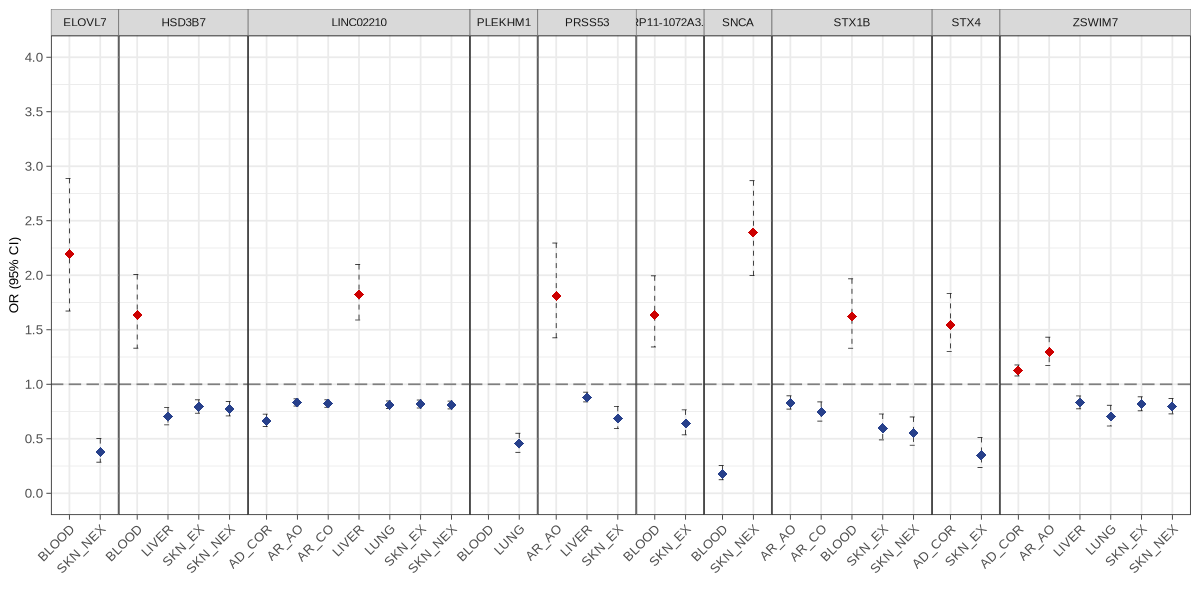

In [13]:
options(repr.plot.width = 10, repr.plot.height = 5)
merged_mr_and_afc_selected_genes %>% 
    dplyr::select(exposure, or, or_lci95, or_uci95, tissue) %>% 
    distinct() %>% 
    ggplot(aes(tissue, or)) +
    geom_errorbar(aes(ymax = or_uci95, ymin = or_lci95), linewidth = 0.2, 
                  width = 0.25, color = "black", 
                  linetype = "dashed") +
    geom_point(shape = 18, size = 2.5, color = ifelse(merged_mr_and_afc_selected_genes$or > 1, "red3", "royalblue4")) +
    geom_hline(yintercept = 1, color = "grey50", linetype = "longdash") +
    scale_y_continuous(limits = c(0, 4), breaks = seq(0, 4, 0.5)) +
    labs(x = "", y = "OR (95% CI)") +
    theme_bw() +
    facet_grid(. ~exposure, scale = "free_x", space='free') +
    theme(axis.text = element_text(size = 8),
         axis.text.x = element_text(size = 8, angle = 45, hjust = 1),
         axis.title = element_text(size = 8),
         strip.text.x = element_text(size = 7),
         axis.ticks = element_line(linewidth = 0.25),
         panel.spacing = unit(0, "mm"),
         strip.background = element_rect(linewidth = 0.2))

## Figure2

In [4]:
merged_mr_and_afc_selected_genes <- read_tsv("../data/adult_tissues_merged_mr_strong_afc_res.txt",
                             show_col_types = FALSE) %>% 
    filter(exposure =="SNCA") %>% 
    distinct()

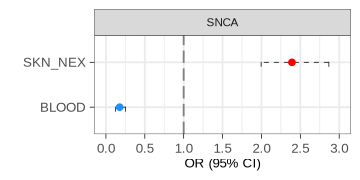

In [17]:
# OR
snca_or <- merged_mr_and_afc_selected_genes %>% 
dplyr::select(exposure, tissue, or, or_lci95, or_uci95) %>% 
filter(exposure == "SNCA") 
options(repr.plot.width = 3, repr.plot.height = 1.5)
snca_or %>% 
ggplot(aes(or, tissue)) +
    geom_errorbar(aes(xmax = or_uci95, xmin = or_lci95), linewidth = 0.2, 
                  width = 0.2, color = "black", 
                  linetype = "dashed") +
    geom_point(size = 1.5, 
               colour = ifelse(snca_or$or > 1, "red", "dodgerblue")) +
    geom_vline(xintercept = 1, color = "grey50", linetype = "longdash") +
    scale_x_continuous(limits = c(0, 3), breaks = seq(0, 3, 0.5)) +
    labs(x = "OR (95% CI)", y = "") +
    theme_bw() +
    facet_grid(. ~exposure, space='free') +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(size = 8, hjust = 0.5, vjust = 0.5),
          axis.title = element_text(size = 8),
          axis.ticks = element_line(colour = "black", linewidth = 0.2),
          strip.text.x = element_text(size = 7),
          strip.background = element_rect(color = "black", linewidth = 0.2),
          panel.border = element_rect(color = "black", fill = NA, linewidth = 0.2))

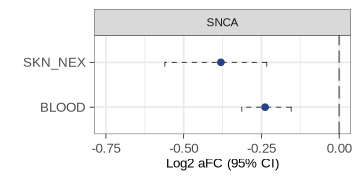

In [18]:
snca_afc <- merged_mr_and_afc_selected_genes %>% 
dplyr::select(exposure, tissue, log2_aFC, log2_aFC_lower, log2_aFC_upper) %>% 
filter(exposure == "SNCA") 
options(repr.plot.width = 3, repr.plot.height = 1.5)
snca_afc %>% 
ggplot(aes(log2_aFC, tissue)) +
    geom_errorbar(aes(xmax = log2_aFC_upper, xmin = log2_aFC_lower), linewidth = 0.2, 
                  width = 0.2, color = "black", 
                  linetype = "dashed") +
    geom_point(size = 1.5, 
               colour = ifelse(snca_afc$log2_aFC > 0, "red3", "royalblue4")) +
    geom_vline(xintercept = 0, color = "grey50", linetype = "longdash") +
    scale_x_continuous(limits = c(-0.75, 0), breaks = seq(-0.75, 0, 0.25)) +
    labs(x = "Log2 aFC (95% CI)", y = "") +
    theme_bw() +
    facet_grid(. ~exposure, space='free') +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(size = 8, hjust = 0.5, vjust = 0.5),
          axis.title = element_text(size = 8),
          axis.ticks = element_line(colour = "black", linewidth = 0.2),
          strip.text.x = element_text(size = 7),
          strip.background = element_rect(color = "black", linewidth = 0.2),
          panel.border = element_rect(color = "black", fill = NA, linewidth = 0.2))

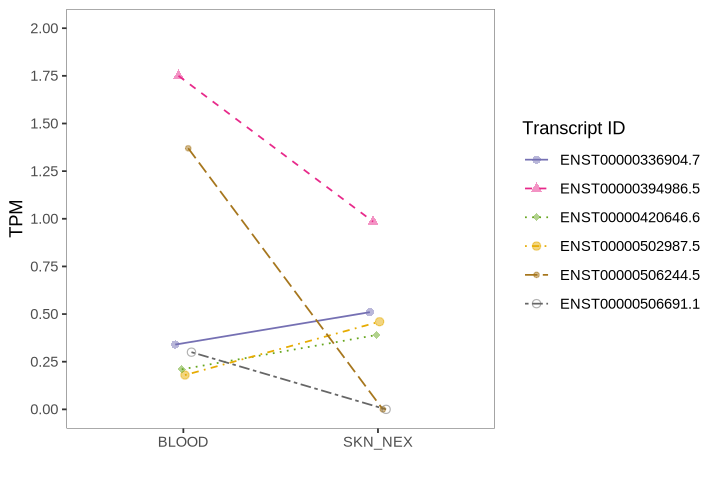

In [22]:
# TPM
snca_tpm <- read_tsv("../data/isoform_tpms/SNCA.txt", show_col_types = FALSE) %>% 
rename("transcriptID"="Transcript ID") 

# snca_tpm
snca_tpm_high <- snca_tpm %>% 
filter(transcriptID %in% c("ENST00000508895.5", "ENST00000394991.7"))

snca_tpm_low <- snca_tpm %>% 
filter(!transcriptID %in% snca_tpm_high$transcriptID)

options(repr.plot.width = 6, repr.plot.height = 4)
snca_tpm_low %>% ggplot(aes(x=Tissue, y=TPM, group=transcriptID, 
                          color = transcriptID)) +
geom_line(aes(linetype=transcriptID), size=0.5, position = position_dodge(width = 0.1)) +
geom_point(aes(shape=transcriptID), size=2, position = position_dodge(width = 0.1), alpha = 0.5) +
scale_linetype_manual(values = c(1,2,3,4,5,6,7,8)) +
scale_shape_manual(values=c(16,17,18,19,20,21,22,23)) +
scale_colour_manual(values = c('#7570B3','#E7298A',
                               '#66A61E','#E6AB02','#A6761D','#666666',
                              '#E41A1C','#377EB8','#A65628','#F781BF')) +
scale_y_continuous(limits = c(0,2), breaks = seq(0,2,0.25)) +
labs(x = "", color = "Transcript ID", linetype = "Transcript ID", shape = "Transcript ID") +
theme_bw() +
theme(panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     panel.border = element_rect(color = "black", fill = NA, linewidth = 0.2))

In [128]:
# snca_transcripts <- read_tsv("../data/snca_transcript_TPMs.txt",
#                             show_col_types = FALSE)
# snca_transcriptss <- snca_transcripts %>% 
#     filter(Name %in% c("ENST00000420646.6", "ENST00000506691.1") & !COHORT_DEFINITION == "control") %>% 
#     dplyr::select(Name, PATNO, tpm, COHORT_DEFINITION) %>% 
#     pivot_wider(names_from = "Name", values_from = "tpm", 
#                 id_cols = c("PATNO", "COHORT_DEFINITION"), values_fn = mean) %>% 
#     pivot_longer(names_to = "name", values_to = "tpm", cols = c(3:ncol(.))) %>% 
#     arrange(PATNO)

# options(repr.plot.width=5, repr.plot.height=4)
# snca_transcriptss %>% 
# ggplot(aes(x = COHORT_DEFINITION, y = tpm, fill=COHORT_DEFINITION)) +
# geom_boxplot(stat = "boxplot", outlier.shape = NA, linewidth = 0.25, linetype = "solid") +
# scale_fill_manual(values = c( "#47b7b6", "#0073b2")) +
# labs(x="", y="TPM") +
# scale_y_continuous(expand = c(0.05, 0.01), limits = c(0,10), breaks = seq(0,10,2)) +
# facet_wrap(~ name, scales = "free_y") +
# theme_bw() +
# theme(legend.position = "none",
#      panel.grid = element_blank()) 
# # ggsave("../snca_transccript_ppmi.pdf", width = 5, height = 4)

# # Statistical test
# snca.stat.test <- snca_transcriptss %>%
#   group_by(name) %>%
#   wilcox_test(tpm ~ COHORT_DEFINITION) 
# snca.stat.test

Warning message:
“Removed 66 rows containing non-finite outside the scale range (`stat_boxplot()`).”


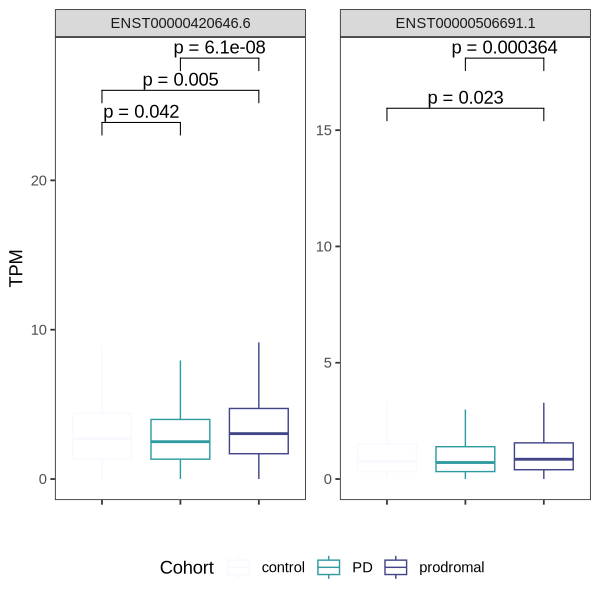

Warning message:
“Removed 66 rows containing non-finite outside the scale range (`stat_boxplot()`).”


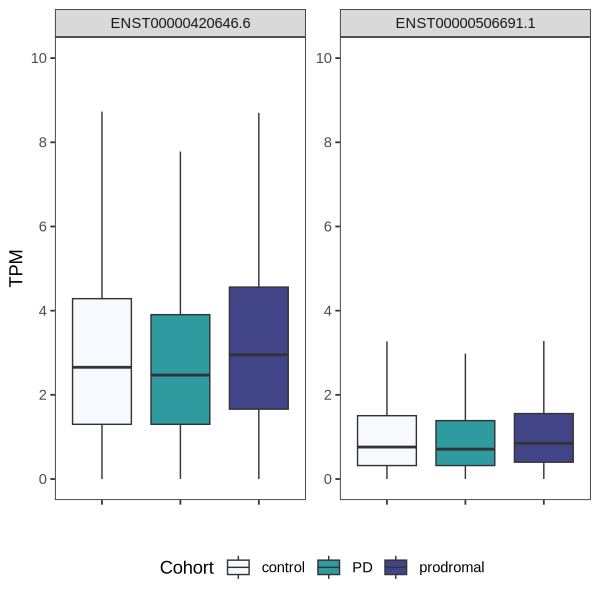

In [127]:
library(ggplot2)
library(dplyr)
library(ggpubr)
library(readr)
library(rstatix)

# Load data
snca_transcripts <- read_tsv("../../results/transcript_results_ppmi/snca_transcript_TPMs.txt",
                             show_col_types = FALSE)

# Filter for specific transcripts
snca_transcripts <- snca_transcripts %>% 
    filter(Name %in% c("ENST00000420646.6", "ENST00000506691.1"))

# Perform Wilcoxon test for each transcript
snca.stat.test <- snca_transcripts %>%
  group_by(Name) %>%
  wilcox_test(tpm ~ COHORT_DEFINITION) %>%
  mutate(p.format = signif(p, digits = 3)) %>%  # Format p-values
  add_xy_position(x = "COHORT_DEFINITION", step.increase = 0.1)  # Ensure proper spacing

# Plot with p-values
options(repr.plot.width=5, repr.plot.height=5)
p1 <- snca_transcripts %>% 
  ggplot(aes(x = COHORT_DEFINITION, y = tpm, color = COHORT_DEFINITION)) +
  geom_boxplot(outlier.shape = NA, linewidth = 0.4) +
  scale_color_manual(values = c("ghostwhite", "#2f9aa0FF", "#414487FF")) +
  labs(x = "", y = "TPM", color = "Cohort") +
  facet_wrap(~ Name, scales = "free_y") +
  stat_pvalue_manual(
    snca.stat.test, label = "p = {p.format}",
    bracket.nudge.y = 0.2, tip.length = 0.03, hide.ns = TRUE
  ) +
  theme_bw() +
  theme(axis.text.x = element_blank(),
        panel.grid = element_blank(),
        legend.position = "bottom")
p1
ggsave("../../plots/manuscript/snca_transcripts_66aa_112aa_with_pval.pdf", 
       plot = p1, width = 5, height = 5)

# Plot without p-values (for cleaner presentation)
options(repr.plot.width=5, repr.plot.height=5)
p2 <- snca_transcripts %>% 
  ggplot(aes(x = COHORT_DEFINITION, y = tpm, fill = COHORT_DEFINITION)) +
  geom_boxplot(outlier.shape = NA, linewidth = 0.4) +
  scale_y_continuous(limits=c(0,10), breaks = seq(0,20,2)) +
  scale_fill_manual(values = c("ghostwhite", "#2f9aa0FF", "#414487FF")) +
  labs(x = "", y = "TPM", fill = "Cohort") +
  facet_wrap(~ Name, scales = "free_y") +
  theme_bw() +
  theme(axis.text.x = element_blank(),
        panel.grid = element_blank(),
        legend.position = "bottom")
p2
ggsave("../../plots/manuscript/snca_transcripts_66aa_112aa_without_pval.pdf", 
       plot = p2, width = 5, height = 5)


In [116]:
snca_transcripts <- read_tsv("../data/snca_transcript_TPMs.txt",
                            show_col_types = FALSE)
snca_transcriptss <- snca_transcripts %>% 
    filter(Name %in% c("ENST00000420646.6", "ENST00000506691.1") & !COHORT_DEFINITION == "control") %>% 
    dplyr::select(Name, PATNO, tpm, COHORT_DEFINITION) %>% 
    pivot_wider(names_from = "Name", values_from = "tpm", 
                id_cols = c("PATNO", "COHORT_DEFINITION"), values_fn = mean) %>% 
    pivot_longer(names_to = "name", values_to = "tpm", cols = c(3:ncol(.))) %>% 
    arrange(PATNO)

snca_transcriptss %>% 
group_by(name, COHORT_DEFINITION) %>% 
summarize(mean_tpm = mean(tpm))

## prodromal 112:66 tm ratio
3.574082/1.171540

## PD 112:66 tm ratio
2.962001/1.070965

`summarise()` has grouped output by 'name'. You can override using the `.groups` argument.


name,COHORT_DEFINITION,mean_tpm
<chr>,<chr>,<dbl>
ENST00000420646.6,PD,2.962001
ENST00000420646.6,prodromal,3.574082
ENST00000506691.1,PD,1.070965
ENST00000506691.1,prodromal,1.171540


[1] 3.050755

[1] 2.765731

In [124]:
ppmi_participants <- read_tsv("../data/ppmi_participants_static_info_table.tsv",
                             show_col_types = FALSE) %>% 
    dplyr::select(PATNO, COHORT_DEFINITION) %>% 
    distinct()

rs2583990_n_rs356224_pd <- read_tsv("../data/snp_combinations_patno.txt",
                                       show_col_types = FALSE) %>% 
    filter(COHORT_DEFINITION == "Parkinson's Disease")%>% 
    distinct()

ppmi_participants_pd <- ppmi_participants %>% 
filter(COHORT_DEFINITION == "Parkinson's Disease") %>% 
distinct(PATNO)

## how many PPMI PD patients have risk alleles (rs2583990_GG - rs356224_GG)?
ppmi_participants_pd_risk_allele <- ppmi_participants_pd %>% 
inner_join(rs2583990_n_rs356224_pd, by = "PATNO")  %>% 
group_by(snp_combi) %>% 
summarise(n = length(unique(PATNO)))

saa_dat <- read_csv("../data/SAA_Biospecimen_Analysis_Results_07Apr2024.csv",
                   show_col_types = FALSE)

saa_pos <- saa_dat %>% 
    # dplyr::select(PATNO, COHORT, CLINICAL_EVENT, SAA_Status, PROJECTID) %>% 
    filter(COHORT == "PD") %>% 
    filter(SAA_Status == "Positive" & PROJECTID == 237 & CLINICAL_EVENT == "BL") %>% 
    dplyr::select(PATNO, SAA_Status) %>% 
    distinct() # 544 PD patients are SAA+
saa_neg <- saa_dat %>% 
    # dplyr::select(PATNO, COHORT, CLINICAL_EVENT, SAA_Status, PROJECTID) %>% 
    filter(COHORT == "PD") %>% 
    filter(SAA_Status == "Negative" & PROJECTID == 237 & !PATNO %in% saa_pos$PATNO & CLINICAL_EVENT == "BL") %>% 
    dplyr::select(PATNO, SAA_Status) %>% 
    distinct() # 117 PD patients are SAA-

## How many PD people with SAA+ data have risk alleles?
saa_pos_pd <- saa_pos %>% 
inner_join(rs2583990_n_rs356224_pd, by = "PATNO")  %>% 
group_by(snp_combi) %>% 
summarise(n = length(unique(PATNO))) 
saa_pos_pd 

## How many PD people with SAA- data have risk alleles?
saa_neg_pd <- saa_neg %>% 
inner_join(rs2583990_n_rs356224_pd, by = "PATNO")  %>% 
group_by(snp_combi) %>% 
summarise(n = length(unique(PATNO))) 
saa_neg_pd 



snp_combi,n
<chr>,<int>
rs2583990_AA - rs356224_GG,4
rs2583990_AG - rs356224_AA,1
rs2583990_AG - rs356224_AG,6
rs2583990_AG - rs356224_GG,4
rs2583990_GG - rs356224_AA,4
rs2583990_GG - rs356224_AG,19
rs2583990_GG - rs356224_GG,10


snp_combi,n
<chr>,<int>
rs2583990_AA - rs356224_AG,1
rs2583990_AA - rs356224_GG,5
rs2583990_AG - rs356224_AA,1
rs2583990_AG - rs356224_AG,3
rs2583990_AG - rs356224_GG,4
rs2583990_GG - rs356224_AA,1
rs2583990_GG - rs356224_AG,7
rs2583990_GG - rs356224_GG,3


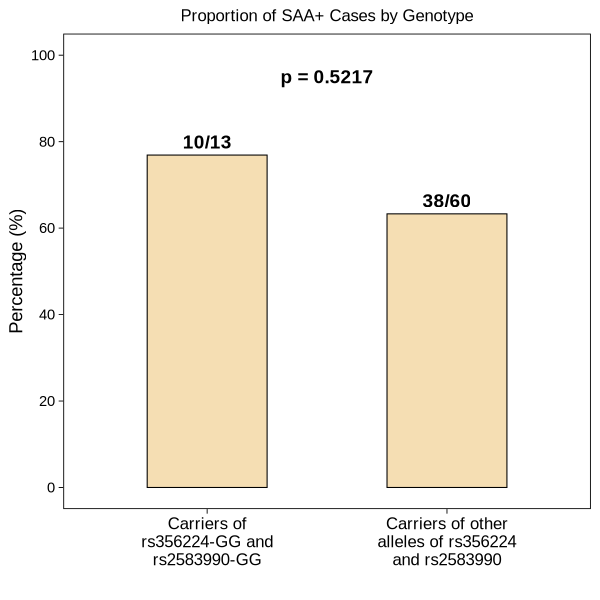

In [95]:
library(ggplot2)
library(dplyr)
library(tidyr)

# Create data frame (with check.names = FALSE to preserve spaces in column names)
df <- data.frame(
  cat = c("SAA+", "SAA-"),
  "Carriers of rs356224-GG and rs2583990-GG" = c(10, 3),
  "Carriers of other alleles of rs356224 and rs2583990" = c(38, 22),
  check.names = FALSE  # Prevents automatic conversion of column names
)

# Reshape data and filter only SAA+
df <- df %>%
  pivot_longer(cols = c(`Carriers of rs356224-GG and rs2583990-GG`, 
                        `Carriers of other alleles of rs356224 and rs2583990`),
               values_to = "count",
               names_to = "allele") %>%
  group_by(allele) %>%
  mutate(total = sum(count),  
         prop = round(count / total * 100, 1),  
         label = paste0(count, "/", total)) %>%  
  filter(cat == "SAA+")  # Keep only SAA+ data

# Modify x-axis labels to include line breaks
df$allele <- factor(df$allele, 
                    levels = c("Carriers of rs356224-GG and rs2583990-GG", 
                               "Carriers of other alleles of rs356224 and rs2583990"),
                    labels = c("Carriers of\nrs356224-GG and\nrs2583990-GG",  
                               "Carriers of other\nalleles of rs356224\nand rs2583990"))

# Perform Fisher's exact test
dat <- matrix(c(10, 3, 38, 22), nrow = 2, byrow = TRUE,
              dimnames = list(c("SAA+", "SAA-"), 
                              c("Carriers of rs356224-GG and rs2583990-GG", 
                                "Carriers of other alleles of rs356224 and rs2583990")))
test <- fisher.test(dat, simulate.p.value = TRUE)

# Create the plot
options(repr.plot.width=5, repr.plot.height=5)
ggplot(df, aes(x = allele, y = prop,  label = label)) +
  geom_bar(stat = "identity", width = 0.5, fill = "wheat", color = "black",
           linewidth = 0.3, show.legend = FALSE) +
  geom_text(vjust = -0.5, size = 4, fontface = "bold") +  
  scale_y_continuous(limits = c(0, 100), breaks = seq(0, 100, 20)) +
  # scale_fill_manual(values = c("wheat", "royalblue4")) +
  labs(x = "", y = "Percentage (%)", title = "Proportion of SAA+ Cases by Genotype") +
  theme_linedraw() +
  theme(panel.grid = element_blank(),
        axis.text.x = element_text(hjust = 0.5, size = 10),
        plot.title = element_text(hjust = 0.5, size = 10)) +  # Centered text
  annotate("text", x = 1.5, y = 95, label = paste("p =", round(test$p.value, 4)), fontface = "bold", size = 4)
ggsave("../../plots/manuscript/figure3b.pdf", width = 5, height = 5)